## Dataclass represents graph data structure

In [ ]:
import csv, json, sys, math
from matplotlib import pyplot as plt
from dataclasses import dataclass


@dataclass
class Graph:
    v_count = 0  # number of vertexes
    edge_list = []  # list of edges
    adjac_m = []  # adjacent matrix

    avg_d = 0.0  # average vertexes degree
    max_d = 0  # maximal vertexes degree
    min_d = sys.maxsize  # minimal vertexes degree

    v_dst = []  # distances between vertexes
    avg_dst = 0  # average distance between vertexes

    def __compute_shortest_distances(self) -> None:
        for l in self.adjac_m:
            l = list(map(lambda x: float("inf") if x == 0 else x, l))
            self.v_dst.append(l)

        # O(n^3)
        # Floyd-Warshall algorithm
        for k in range(self.v_count):
            for i in range(self.v_count):
                for j in range(self.v_count):
                    if self.v_dst[i][j] > self.v_dst[i][k] + self.v_dst[k][j]:
                        self.v_dst[i][j] = self.v_dst[i][k] + self.v_dst[k][j]

    def read_data(self, file_path: str) -> None:
        self.edge_list = []
        self.adjac_m = []

        try:
            with open(file_path) as f:
                data = csv.reader(f, delimiter=";")
                # O(n)
                v = set()
                for r in data:
                    v.add(r[0])
                    v.add(r[1])
                    if int(r[0]) == int(r[1]):
                        print("Loops are not allowed in the dataset")
                        sys.exit()
                    self.edge_list.append((int(r[0]), int(r[1])))

                self.v_count = len(v)

            # O(n^2)
            for i in range(self.v_count):
                my_list = [0] * self.v_count
                for j in self.edge_list:
                    if j[1] == (i + 1):
                        my_list[j[0] - 1] = 1
                    if j[0] == (i + 1):
                        my_list[j[1] - 1] = 1
                self.adjac_m.append(my_list)

            # O(n^2)
            for i in self.adjac_m:
                v_d = list(i).count(1)
                if v_d > self.max_d:
                    self.max_d = v_d
                if v_d < self.min_d:
                    self.min_d = v_d

            self.avg_d = round(len(self.edge_list) * 2 / self.v_count, 2)

        except (IndexError, ValueError):
            print(
                f"Vertex numbers must be represented by an ascending series "
                f"without skipped numbers"
            )
            sys.exit()

    def print_adjac_m(self) -> None:
        print(f"\nMATRIX REPRESENTATION")
        print("-——" * (self.v_count - 1), end="")
        print("-")
        for x, i in enumerate(self.adjac_m):
            for y, j in enumerate(i):
                if y == self.v_count - 1:
                    print(j, end="")
                    continue
                print(j, end="  ")
            if x != len(self.adjac_m) - 1:
                print("")
        print("")
        print("-——" * (self.v_count - 1), end="")
        print("-")

    def print_edge_list(self) -> None:
        print("\nLIST OF EDGES\n[", end="\n ")
        for x, i in enumerate(self.edge_list):
            if x % 10 == 0 and x != 0:
                print("", end="\n ")
            print(f"{i}, ", end="")
        print("\n]")

    def print_degree(self) -> None:
        print(f"\nMIN. VERTEX DEGREE: {g.min_d}")
        print(f"MAX. VERTEX DEGREE: {g.max_d}")
        print(f"AVG. VERTEX DEGREE: {g.avg_d}\n")

    def print_frequency_degree_hist(self) -> None:
        v_d = []
        for i in self.adjac_m:
            v_d.append(list(i).count(1))
        plt.subplots(figsize=(6, 5.2))
        plt.hist(v_d, bins=range(g.min_d, g.max_d + 2), align="left", edgecolor="black")
        plt.xticks(range(g.min_d, g.max_d + 1))
        plt.yticks(range(0, math.floor(plt.ylim()[1]) + 1))
        plt.ylabel("frequency of vertexes")
        plt.xlabel("degree of vertexes")
        plt.title("Frequency of degrees of vertexes")
        plt.grid(axis="y")
        plt.show()

    def print_centrality(self) -> None:
        if len(self.v_dst) == 0:
            self.__compute_shortest_distances()

        print(f"\nDISTANCE BETWEEN VERTICES")
        diameter = {"from": None, "to": None, "dst": 0}
        count = 1
        for x, i in enumerate(self.v_dst):
            print(f"{x + 1}:")
            sum = 0
            for y, j in enumerate(i):
                if j > diameter["dst"]:
                    diameter["dst"] = j
                    diameter["from"] = x + 1
                    diameter["to"] = y + 1
                print(f"[{x + 1}->{y + 1}: {j}]", end="")
                if count % 10 == 0:
                    print("")
                count += 1
                sum += j
            count = 1
            print(f"\nMEAN DISTANCE: {(1 / self.v_count) * sum}")
            print(f"CLOSENESS CENTRALITY: {self.v_count / sum}")
            print("-——" * (self.v_count - 1))
        print(
            f"GLOBAL DIAMETER: [{diameter['from']}->{diameter['to']}: "
            f"{diameter['dst']}]"
        )

## Instantiate graph class

In [62]:
g = Graph()
g.read_data("KarateClub.csv")

### DU1


MATRIX REPRESENTATION
-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-
0  1  1  1  1  1  1  1  1  0  1  1  1  1  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  1  0  0
1  0  1  1  0  0  0  1  0  0  0  0  0  1  0  0  0  1  0  1  0  1  0  0  0  0  0  0  0  0  1  0  0  0
1  1  0  1  0  0  0  1  1  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  1  0
1  1  1  0  0  0  0  1  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

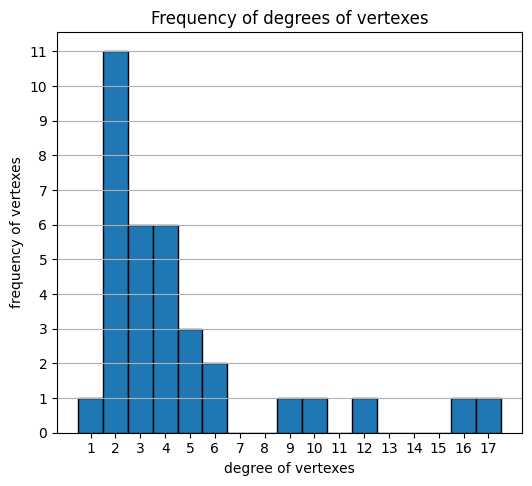

In [63]:
g.print_adjac_m()
g.print_edge_list()
g.print_degree()
g.print_frequency_degree_hist()

### DU2

In [64]:
g.print_centrality()


DISTANCE BETWEEN VERTICES
1:
[1->1: 2][1->2: 1][1->3: 1][1->4: 1][1->5: 1][1->6: 1][1->7: 1][1->8: 1][1->9: 1][1->10: 2]
[1->11: 1][1->12: 1][1->13: 1][1->14: 1][1->15: 3][1->16: 3][1->17: 2][1->18: 1][1->19: 3][1->20: 1]
[1->21: 3][1->22: 1][1->23: 3][1->24: 3][1->25: 2][1->26: 2][1->27: 3][1->28: 2][1->29: 2][1->30: 3]
[1->31: 2][1->32: 1][1->33: 2][1->34: 2]
MEAN DISTANCE: 1.7647058823529411
CLOSENESS CENTRALITY: 0.5666666666666667
-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——
2:
[2->1: 1][2->2: 2][2->3: 1][2->4: 1][2->5: 2][2->6: 2][2->7: 2][2->8: 1][2->9: 2][2->10: 2]
[2->11: 2][2->12: 2][2->13: 2][2->14: 1][2->15: 3][2->16: 3][2->17: 3][2->18: 1][2->19: 3][2->20: 1]
[2->21: 3][2->22: 1][2->23: 3][2->24: 3][2->25: 3][2->26: 3][2->27: 3][2->28: 2][2->29: 2][2->30: 3]
[2->31: 1][2->32: 2][2->33: 2][2->34: 2]
MEAN DISTANCE: 2.0588235294117645
CLOSENESS CENTRALITY: 0.4857142857142857
-——-——-——-——-——-——-——-——-——-——-——-——-——-——-——-—